# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

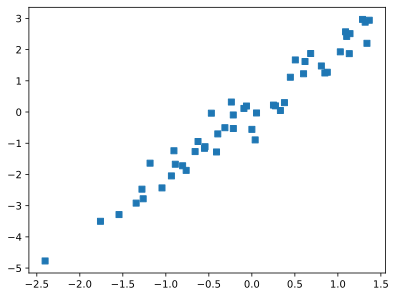

In [25]:
# create data
def build_data(m):
   N = 50
   x = torch.randn(N, 1)
   y = m * x + torch.randn(N, 1) / 2

   return x, y

# and plot
data = build_data(2)
plt.plot(data[0], data[1], 's')
plt.show()

In [23]:
def build_and_train_model(x, y, epochs = 500, learningRate = 0.05):
    # build model
    model = nn.Sequential(nn.Linear(1,1), nn.ReLU(), nn.Linear(1,1))

    # define loss function
    loss_fn = nn.MSELoss()
    losses = torch.zeros(epochs)

    # define optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

    # train
    for epoch in range(epochs):
        # forward pass
        y_pred = model(x)

        # compute loss
        loss = loss_fn(y_pred, y)
        losses[epoch] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = model(x)

    return predictions, losses

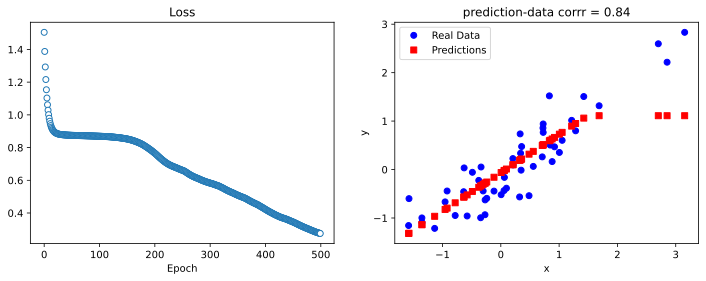

In [35]:
# single test
x, y = build_data(.8)
predictions, losses = build_and_train_model(x, y)

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label = 'Real Data')
ax[1].plot(x, predictions.detach(), 'rs', label = 'Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corrr = {np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [38]:
# parametric experiment

slopes = np.linspace(-2, 2, 21)
experiments = 50

results = np.zeros((len(slopes), experiments, 2))

for slope in range(len(slopes)):
    for experiment in range(experiments):
        x, y = build_data(slopes[slope])
        predictions, losses = build_and_train_model(x, y)

        results[slope, experiment, 0] = losses[-1]
        results[slope, experiment, 1] = np.corrcoef(y.T, predictions.detach().T)[0,1]

results[np.isnan(results)] = 0

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


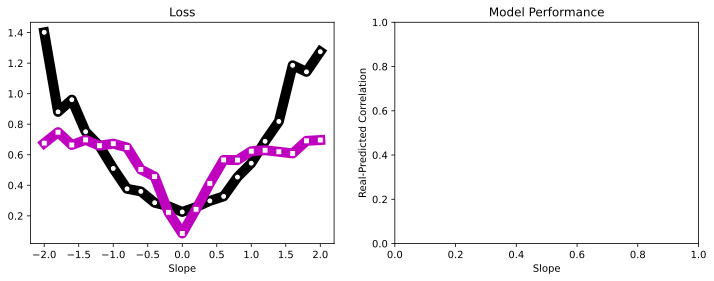

In [41]:
# show the results

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(slopes, np.mean(results[:, :, 0], axis = 1), 'ko-', markerfacecolor = 'w', linewidth = 10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[0].plot(slopes, np.mean(results[:, :, 1], axis = 1), 'ms-', markerfacecolor = 'w', linewidth = 10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-Predicted Correlation')
ax[1].set_title('Model Performance')

plt.show()